In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read the training data
def readData(FileName):
    df=pd.read_csv(FileName)
    return df.values

In [5]:
X=readData('Linear_X_Train.csv')
Y=readData('Linear_Y_Train.csv')
X=X.reshape((X.shape[0],))
Y=Y.reshape((Y.shape[0],))
print(X.shape)
print(Y.shape)

(3750,)
(3750,)


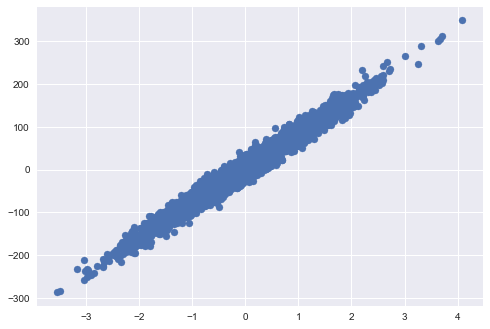

In [6]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

# Algorithm

In [20]:
def hypothesis(theta,x):
    return theta[0]+theta[1]*x
def error(theta,X,Y):
    total_error=0
    m=X.shape[0]
    for i in range(m):
        total_error+=((hypothesis(theta,X[i]-Y[i]))**2)
    return 0.5*total_error
def gradient(theta,X,Y):
    grad=np.array([0.0,0.0])
    m=X.shape[0]
    for i in range(m):
        grad[0]+=(hypothesis(theta,X[i])-Y[i])
        grad[1]+=(hypothesis(theta,X[i])-Y[i])*X[i]
    return grad
def gradientDescent(X,Y,learning_rate=0.0001,max_itr=200):
    theta=np.array([0.0,0.0])
    for i in range(max_itr):
        grad=gradient(theta,X,Y)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta

In [21]:
theta=gradientDescent(X,Y)
print(theta[0],theta[1])

3.7279882838547374 80.54363185401215


# Testing

In [22]:
xtest=np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


No handles with labels found to put in legend.


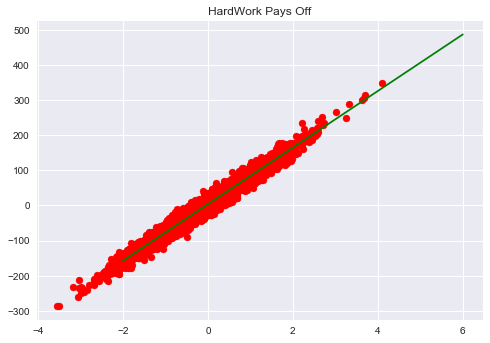

In [23]:
plt.scatter(X,Y,color='red')
plt.plot(xtest,hypothesis(theta,xtest),color='green')
plt.title("HardWork Pays Off")
plt.legend()
plt.show()


In [24]:
print(int(np.round(2.99988)))

3


# Testing Starts From Here

In [25]:
test_data=pd.read_csv('Linear_X_Test.csv')
test_data=test_data.values
test_data=test_data.reshape((test_data.shape[0]))
print(test_data.shape)

(1250,)


In [26]:
final_predictions=[]
for i in range(test_data.shape[0]):
    final_predictions.append(int(np.round(hypothesis(theta,test_data[i]))))

In [27]:
print(final_predictions)

[-148, -66, -200, 226, 51, -101, -12, 27, -62, -117, -11, 10, -37, 68, 12, -9, 26, 108, 177, 23, -31, 22, -52, -147, 70, 110, 155, 12, 35, -92, 131, 64, -19, 120, 167, -90, -151, 11, -41, 27, 37, 6, 24, 138, -49, 30, 50, -46, -15, 115, 156, 114, 47, -69, -177, 18, 11, -50, -72, -21, -9, 45, -75, 38, -77, 70, 135, 104, -54, -122, -160, 56, -120, -153, 44, 96, 18, -6, 150, 46, -56, -89, -110, 66, -76, -16, -92, -42, 17, 43, -136, 52, -66, -3, 85, 74, -59, -5, 24, 5, 108, -112, 22, -191, 49, -12, 130, -49, 8, -74, 89, -16, 100, -74, -77, -101, 48, -20, -149, 48, 8, 28, -9, 74, -25, -79, -4, 4, 1, -6, 22, -69, -39, -60, -28, 5, -46, 14, -45, 84, 47, -46, 201, -69, -71, -71, 23, 115, -11, 60, 24, 114, -77, -139, 13, -30, -29, -114, 24, -19, -8, -62, 111, 15, 93, -19, 103, -7, -164, -31, -25, -51, -6, 94, 81, 14, 35, 81, -47, -193, 52, 100, -103, -93, -29, -149, 136, -31, 230, 246, 72, 46, 57, 132, -26, -82, 59, 87, 23, -156, 56, 48, -27, -41, -32, -121, 1, -66, 7, -167, -99, 36, 81, 80, 113

In [28]:
final_predictions=np.array(final_predictions)
print(type(final_predictions))

<class 'numpy.ndarray'>


In [29]:
print(final_predictions.shape)

(1250,)


In [30]:
result_df=pd.DataFrame(final_predictions,columns=["y"])

In [31]:
result_df.to_csv("Regression_Result.csv",index=False)